---
# Brazilian E-Commerce Olist
---

In [244]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs , init_notebook_mode ,plot ,iplot 
init_notebook_mode(connected=True)
%matplotlib inline
sas.set()

In [245]:
customers = pd.read_csv('H:/PYTHON/python for data science/s11-project/Brazilian E-Commerce/olist_customers_dataset.csv')
geolocation = pd.read_csv('H:/PYTHON/python for data science/s11-project/Brazilian E-Commerce/olist_geolocation_dataset.csv')
order_items = pd.read_csv('H:/PYTHON/python for data science/s11-project/Brazilian E-Commerce/olist_order_items_dataset.csv')
order_payments = pd.read_csv('H:/PYTHON/python for data science/s11-project/Brazilian E-Commerce/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('H:/PYTHON/python for data science/s11-project/Brazilian E-Commerce/olist_order_reviews_dataset.csv')
orders = pd.read_csv('H:/PYTHON/python for data science/s11-project/Brazilian E-Commerce/olist_orders_dataset.csv')
products = pd.read_csv('H:/PYTHON/python for data science/s11-project/Brazilian E-Commerce/olist_products_dataset.csv')
sellers = pd.read_csv('H:/PYTHON/python for data science/s11-project/Brazilian E-Commerce/olist_sellers_dataset.csv')
product_category = pd.read_csv('H:/PYTHON/python for data science/s11-project/Brazilian E-Commerce/product_category_name_translation.csv')



In [246]:
olist = customers.merge(orders ,  on = 'customer_id' )\
    .merge(order_items, on = 'order_id')\
        .merge(order_payments , on = 'order_id')\
            .merge(order_reviews , on = 'order_id')\
                .merge(products , on = 'product_id')\
                    .merge(product_category , on = 'product_category_name')\
                        .merge(sellers , on = 'seller_id')
                        

---
## ASK
---

__1-How many orders ?__

__2-How many customer ?__

__3-How many cities buy from us ?__

__4-What are the most popular cities buy from us ?__

__5-What are the most popular cities that don't buy from us ?__

__6-What is the most common state ?__

__7-What is the order's status ?__

__8-Does there particular cities the order doesn't complete in it ?__

__9- What is the most postcode buy from us ?__

__10-How many unique order id we have ?__

__11-Which is the most day's time people buy from us ?__

__12-Which are the most times day people buy from us ?__

__13-What is the total number of orders for each year?__

__14-What is the total number of orders for each month?__

__15-What is the total number of orders for each day?__

__16- What is the common day name ?__

__17-What is the total number of orders for each hour ?__

__18-What is the total number of orders for each minute?__

__19-What is the total number of orders for each week day?__

__20-What is the average delivery time by days and the max and min one ?__

__21-Is the order arrives before estimated delivery time ?__

__22- What is the average estimated delivery time and the max and min one ?__

__23-What is the average time between the time of purchase and payment approval and the max and min one ?__

__24-What is the average time between the time from delivered carrier and delivered customer and the max and min one ?__

__25-What is the average time between the time from shipping limit and purchase time and the max and min one ?__

__26-What is the average review time and the max and min one ?__

__28-Is people do review rapidly from receiving the order ?__

__29-What is the shipping ratio for each price ?__

__30-What is the total price and the average ?__

__31-What is the total freight value and the average ?__

__32-How many customers pay by more than one payment ?__

__33-Which is the most popular payment type ?__

__34-How many customers take more than one installment ?__

__35-What is the average of installments and the max and the min one ?__

__36-What is the total payment value and the average ?__

__37-What is the total and the average payment value for each year ?__

__38-What is the total and the average payment value for each month ?__

__39-What is the total and the average payment value for each day of the month ?__

__40-What is the total and the average payment value for each day of the week ?__

__41-What is the total and the average payment value for each hour ?__

__42-What is the total and the average payment value for each minute ?__

__43-What is the total and the average price for each year and day of month and day of week and hour and minute ?__

__45-What is the average review score and is it bad or good ?__

__46-How many customers don't do a review ?__

__47-What is the total payment value for each city and the highest and lowest value ?__

__48-What is the most popular product ?__

__49-What is the highest and lowest payment value for each product ?__

__50-Is the lenght or weight or height affects on price ?__

__51-How many seller we have ?__

__52-Which seller city has the highest and lowest price ?__

__53-Is the number of picture affects on take the order without any proplem ?__

54-

In [247]:
olist.iloc[:,38:50]

,seller_city,seller_state
0,itaquaquecetuba,SP
1,itaquaquecetuba,SP
2,itaquaquecetuba,SP
3,itaquaquecetuba,SP
4,itaquaquecetuba,SP
...,...,...
115604,lajeado,RS
115605,jau,SP
115606,jau,SP
115607,jau,SP


---
## Preprocessing and Cleaning
---

In [248]:
olist.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

In [249]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  order_item_id                 

In [250]:
olist.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101808


In [251]:
olist = olist.astype({'customer_id':'category',
'customer_unique_id':'category' ,
'customer_zip_code_prefix':'category',
'order_id':'category',
'order_purchase_timestamp':np.datetime64 ,
'order_approved_at':np.datetime64 ,
'order_delivered_carrier_date':np.datetime64 ,
'order_delivered_customer_date':np.datetime64 ,
'order_estimated_delivery_date':np.datetime64 ,
'product_id': 'category',
'seller_id':'category' ,
'shipping_limit_date':np.datetime64 ,
'review_id':'category',
'review_creation_date':np.datetime64 ,
'review_answer_timestamp':np.datetime64 ,
})

In [252]:
olist = olist.convert_dtypes()

In [253]:
olist.payment_type = olist.payment_type.str.replace('_',' ')
olist.product_category_name = olist.product_category_name.str.replace('_',' ')
olist.product_category_name_english = olist.product_category_name_english.str.replace("_"," ")


In [254]:
olist[['review_comment_title','review_comment_message']] = olist[['review_comment_title','review_comment_message']].fillna('No Review')

In [255]:
olist.price + olist.freight_value

0         146.87
1         137.89
2         137.89
3         140.61
4         137.58
           ...  
115604    314.32
115605     31.86
115606     52.77
115607      77.5
115608     24.69
Length: 115609, dtype: Float64

In [256]:
olist['order_purchase_hour'] = olist.order_purchase_timestamp.dt.hour
olist['order_purchase_minute'] = olist.order_purchase_timestamp.dt.minute + 1
olist['order_purchase_day_name'] = olist.order_purchase_timestamp.dt.day_name()
olist['order_purchase_day'] = olist.order_purchase_timestamp.dt.day
olist['order_purchase_month'] = olist.order_purchase_timestamp.dt.month_name()
olist['order_purchase_weekday'] = olist.order_purchase_timestamp.dt.weekday + 1
olist['delivery_time'] = (olist.order_delivered_customer_date - olist.order_purchase_timestamp).dt.days
olist['estimated_Delivery_time'] = (olist.order_estimated_delivery_date - olist.order_purchase_timestamp).dt.days
olist['time_of_payment_approval'] = (olist.order_approved_at - olist.order_purchase_timestamp)
olist['time_from_carrier_to_customer'] = (olist.order_delivered_customer_date - olist.order_delivered_carrier_date)
olist['time_limt_from_pyment_to_shiping'] = (olist.shipping_limit_date - olist.order_purchase_timestamp)
olist['review_time'] = (olist.review_creation_date - olist.order_delivered_customer_date)
olist['price_to_shipping_ratio'] = olist.price / olist.freight_value


In [257]:
olist['order_purchase_AM_PM'] = np.select(
[(olist.order_purchase_hour >= 0) & (olist.order_purchase_hour <= 11), 
(olist.order_purchase_hour >= 12) & (olist.order_purchase_hour <= 24)] , 
['AM','PM'])

In [258]:
olist['order_purchase_time_period'] = np.select(
[(olist.order_purchase_hour >= 0) & (olist.order_purchase_hour <= 5), 
(olist.order_purchase_hour >= 6) & (olist.order_purchase_hour <= 11),
(olist.order_purchase_hour >= 12) & (olist.order_purchase_hour <= 15),
(olist.order_purchase_hour >= 16) & (olist.order_purchase_hour <= 19),
(olist.order_purchase_hour >= 20) & (olist.order_purchase_hour <= 23)] , 
['Dawn', 'Morning','After Noon','Evening','Night'] )

In [259]:
olist = olist.convert_dtypes()

In [260]:
olist.payment_value.describe()

count    115609.000000
mean        172.387379
std         265.873969
min           0.000000
25%          60.870000
50%         108.050000
75%         189.480000
max       13664.080000
Name: payment_value, dtype: float64

array([<AxesSubplot:>], dtype=object)

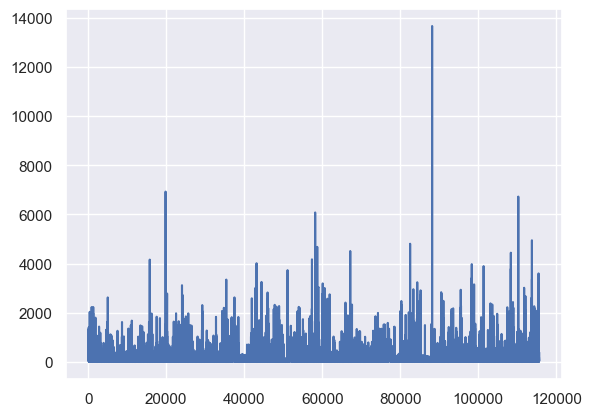

In [261]:
olist.payment_value.plot(subplots=True)

In [262]:
olist.loc[olist.payment_value.argmax() , 'payment_value']

13664.08

In [263]:
olist[olist.payment_value == olist.payment_value.max()].drop_duplicates('payment_value',inplace=True)

C:\Users\bhr\AppData\Local\Temp\ipykernel_9804\894218178.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [264]:
olist.payment_value.replace(olist.loc[olist.payment_value.argmax() , 'payment_value'] , olist.payment_value.mean() , inplace=True)

array([<AxesSubplot:>], dtype=object)

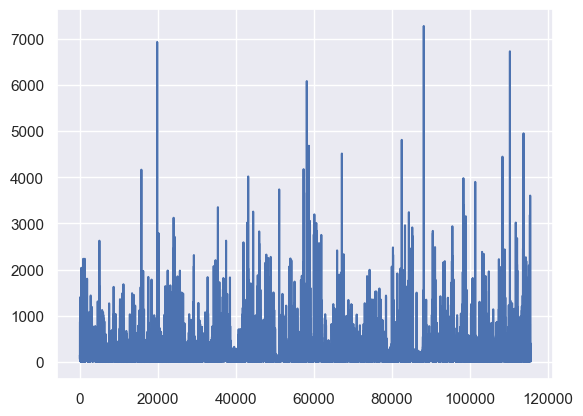

In [265]:
olist.payment_value.plot(subplots=True)

In [266]:
olist['customer_type'] = pd.cut(olist.payment_value , bins=[0 , 60, 108, 189, 80000] , labels=['Bad','Good','Awesome','Loyal'])

In [267]:
olist['review_stats'] = pd.cut(olist.review_score , bins=[0 , 2, 6] , labels=['Bad','Good'])


In [268]:
olist.payment_value.describe()

count    115609.000000
mean        171.453771
std         241.022879
min           0.000000
25%          60.870000
50%         108.050000
75%         189.420000
max        7274.880000
Name: payment_value, dtype: float64

---
# Anlysis and Visulization
---

__1-How many orders ?__

In [269]:
q_1 = olist.customer_id.count()
q_1 

115609

__2-How many customer ?__

In [270]:
q_2 = olist.customer_unique_id.nunique()
q_2

93396

__3-How many cities buy from us ?__

In [271]:
q_3 = olist.customer_city.nunique()
q_3

4093

__4-What are the most popular cities buy from us ?__

In [272]:
q_4 = pd.DataFrame(olist.customer_city.value_counts().head(10)).reset_index()
q_4.columns = ['city','total_number_of_customer']

In [273]:
px.bar(q_4 , 
x ='city' ,
y = 'total_number_of_customer',
text = 'total_number_of_customer',
color_discrete_sequence= px.colors.qualitative.Dark24 ,
color='city',
labels={'total_number_of_customer': ' '},
title='Tota number of customer for each city.',
template='none')

__5-What are the most popular cities that don't buy from us ?__

In [274]:
q_5 = pd.DataFrame(olist.customer_city.value_counts().tail(10)).reset_index()
q_5.columns = ['city','total_number_of_customer']
q_5

,city,total_number_of_customer
0,sao jorge do oeste,1
1,caseiros,1
2,sao bonifacio,1
3,angical,1
4,cezarina,1
5,bonfinopolis de minas,1
6,jamapara,1
7,varzedo,1
8,rubineia,1
9,ipupiara,1


__6-What is the most common state ?__

In [275]:
q_6 = pd.DataFrame(olist.customer_state.value_counts().nlargest(10).reset_index().rename(columns={'index':'customer_state','customer_state':'number_of_customer'}))
q_6

,customer_state,number_of_customer
0,SP,48797
1,RJ,14987
2,MG,13429
3,RS,6413
4,PR,5879
5,SC,4218
6,BA,3942
7,DF,2449
8,GO,2359
9,ES,2300


In [276]:
fig = px.pie(q_6 , values='number_of_customer' , names='customer_state' , color='customer_state' , color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_traces( pull=[0.1 , 0 , 0.2 , 0 , 0 , 0] )

__7-What is the order's status ?__

In [277]:
q_7 = pd.DataFrame(olist.order_status.value_counts().reset_index())
q_7.columns = ['order_status','number_of_order']
q_7

,order_status,number_of_order
0,delivered,113210
1,shipped,1138
2,canceled,536
3,invoiced,358
4,processing,357
5,unavailable,7
6,approved,3


In [278]:
px.bar(q_7 , y='order_status' , x ='number_of_order' , base='number_of_order'  ,color='number_of_order' , text='number_of_order' , hover_name='number_of_order')

__8-Does there particular cities the order doesn't complete in it ?__

In [279]:
q_8 = pd.DataFrame(olist[olist['order_status'] == 'canceled']['customer_city'].value_counts().head().reset_index())
q_8


,index,customer_city
0,sao paulo,139
1,rio de janeiro,31
2,guarulhos,12
3,belo horizonte,12
4,campinas,10


In [280]:
fig = px.pie(q_8 , values='customer_city' , names='index' , hole=0.6 , color_discrete_sequence=px.colors.qualitative.Antique , hover_name='customer_city')
fig.update_traces(pull = [0.1,0.2,0.2,0.2])

__9- What is the most postcode buy from us ?__

In [281]:
q_9 = olist.customer_zip_code_prefix.value_counts().nlargest(10)
q_9

24220    154
22793    151
22790    150
24230    138
22775    126
35162    124
29101    112
11740    110
13087    107
36570    104
Name: customer_zip_code_prefix, dtype: int64

__10-How many unique order id we have ?__

In [282]:
q_10 = olist.order_id.nunique()
q_10

96516

__11-Which is the most day's time people buy from us ?__

In [283]:
q_11 = pd.DataFrame(olist.order_purchase_AM_PM.value_counts().reset_index().rename(columns={'index':'AM_PM','order_purchase_AM_PM':'number_of_order'}))
q_11

,AM_PM,number_of_order
0,PM,84320
1,AM,31289


In [284]:
fig = px.pie(q_11 , values='number_of_order' , names='AM_PM' , template='seaborn')
fig.update_traces(hoverinfo = 'label+percent' , textfont_size = 20)

__12-Which are the most times day people buy from us ?__

In [285]:
q_12 = olist.groupby(['order_purchase_time_period','order_purchase_AM_PM']).agg(number_of_order = ('order_purchase_AM_PM','count')).reset_index()
q_12


,order_purchase_time_period,order_purchase_AM_PM,number_of_order
0,After Noon,PM,29898
1,Dawn,AM,5514
2,Evening,PM,28569
3,Morning,AM,25775
4,Night,PM,25853


In [286]:
px.sunburst(q_12 , 
path=['order_purchase_time_period','order_purchase_AM_PM'] , 
values='number_of_order'  , 
height=800 , color_discrete_sequence=px.colors.qualitative.Set1 , 
branchvalues='remainder' , 
hover_name='number_of_order',
title='Total number of order for each times day .',
template='plotly_dark')

__13-What is the total number of orders for each year?__

In [287]:
q_13 = olist.set_index('order_purchase_timestamp').resample('Y').count()[['customer_id']].reset_index().rename(columns={'customer_id':'number_of_order'})
q_13

,order_purchase_timestamp,number_of_order
0,2016-12-31,381
1,2017-12-31,52507
2,2018-12-31,62721


__14-What is the total number of orders for each month?__

In [288]:
q_14 = olist.pivot_table(index = 'order_purchase_day',columns='order_purchase_month' ,values='customer_id' ,aggfunc='count').reset_index()
q_14.columns.name = ' '
q_14

,order_purchase_day,April,August,December,February,January,July,June,March,May,November,October,September
0,1,303.0,549.0,336.0,351.0,86.0,287.0,359.0,442.0,434.0,131.0,154.0,194.0
1,2,415.0,513.0,235.0,330.0,229.0,352.0,304.0,389.0,500.0,150.0,181.0,126.0
2,3,365.0,526.0,260.0,275.0,245.0,376.0,325.0,314.0,475.0,173.0,233.0,144.0
3,4,403.0,446.0,361.0,303.0,286.0,433.0,369.0,344.0,430.0,140.0,256.0,170.0
4,5,417.0,442.0,324.0,402.0,280.0,398.0,422.0,410.0,349.0,168.0,225.0,197.0
5,6,325.0,566.0,315.0,388.0,270.0,308.0,431.0,422.0,371.0,203.0,215.0,166.0
6,7,282.0,628.0,261.0,424.0,231.0,261.0,432.0,391.0,549.0,183.0,164.0,108.0
7,8,288.0,588.0,255.0,354.0,331.0,237.0,408.0,370.0,525.0,203.0,191.0,135.0
8,9,367.0,498.0,170.0,324.0,278.0,255.0,319.0,374.0,563.0,231.0,266.0,116.0
9,10,319.0,474.0,217.0,271.0,324.0,320.0,315.0,309.0,470.0,198.0,253.0,164.0


In [289]:
fig = px.line(q_14 , 
x = 'order_purchase_day',
y = ['April','August','December','February','January','July','June','March','May','October','September'] , 
line_shape='spline',
template='plotly_white',
color_discrete_sequence=px.colors.qualitative.D3,
labels={'order_purchase_day':'days','value':' '},
title='Total number of oreder for each day by months')
fig

__15-What is the total number of orders for each day?__

In [290]:
q_15 = pd.DataFrame(olist.order_purchase_day.value_counts()).reset_index()
q_15

,index,order_purchase_day
0,24,4501
1,16,4202
2,15,4073
3,5,4034
4,18,4024
5,6,3980
6,19,3955
7,4,3941
8,7,3914
9,26,3890


In [291]:
px.bar(q_15 , 
x = 'index' , 
y = 'order_purchase_day' ,
color='order_purchase_day' ,
labels={'index':'days' , 'order_purchase_day':' '}, 
text='order_purchase_day' ,
color_continuous_scale='viridis' ,
title='Total number of oreder for each day' ,
hover_name='index' )

__16- What is the common day name ?__

In [292]:
q_16 = pd.DataFrame(olist.order_purchase_day_name.value_counts().reset_index().rename(columns={'index':'order_purchase_day_name','order_purchase_day_name':'number_of_order'}))
q_16

,order_purchase_day_name,number_of_order
0,Monday,18769
1,Tuesday,18768
2,Wednesday,18033
3,Thursday,17301
4,Friday,16532
5,Sunday,13722
6,Saturday,12484


In [293]:
px.line(q_16 , 
x = 'order_purchase_day_name' ,
y = 'number_of_order' , 
line_shape='spline',
color_discrete_sequence=['whitesmoke'],
template='plotly_dark',
labels={'number_of_order':' ','order_purchase_day_name':' '},
markers='markers',
hover_name='number_of_order',
title='Total number of order for each day'
)

__17-What is the total number of orders for each hour ?__

In [294]:
q_17 = olist.groupby(['order_purchase_hour','order_purchase_minute']).agg(number_of_order = ('customer_id','count')).reset_index()
q_17

,order_purchase_hour,order_purchase_minute,number_of_order
0,0,1,54
1,0,2,59
2,0,3,46
3,0,4,67
4,0,5,71
...,...,...,...
1428,23,56,72
1429,23,57,72
1430,23,58,56
1431,23,59,50


In [295]:
px.sunburst(q_17 ,
path=['order_purchase_hour','order_purchase_minute'] , 
values='number_of_order' ,
height=800,
hover_data= q_17.columns,
hover_name='order_purchase_minute',
title='total number of order for each hour by minute',
)

__18-What is the total number of orders for each minute?__

In [296]:
q_18 = pd.DataFrame(olist[['order_purchase_minute','order_purchase_AM_PM']].value_counts().reset_index().rename(columns={0:'number_of_order'}))
q_18

,order_purchase_minute,order_purchase_AM_PM,number_of_order
0,27,PM,1525
1,10,PM,1521
2,15,PM,1497
3,50,PM,1485
4,21,PM,1477
...,...,...,...
115,14,AM,468
116,1,AM,465
117,31,AM,455
118,3,AM,446


In [297]:
px.bar(q_18 ,
 x = 'order_purchase_minute' , 
 y = 'number_of_order', 
 color='order_purchase_AM_PM' ,
 template='seaborn' , 
 text='number_of_order' ,
 labels={'number_of_order':' ','order_purchase_minute':'days'},
 title='Total number of order for each minute.')

__19-What is the total number of orders for each week day?__

In [298]:
q_19 = pd.DataFrame(olist[['order_purchase_weekday']].value_counts().reset_index().rename(columns={0:'number_of_order'}))
q_19.order_purchase_weekday = q_19.order_purchase_weekday.astype('category')
q_19

,order_purchase_weekday,number_of_order
0,1,18769
1,2,18768
2,3,18033
3,4,17301
4,5,16532
5,7,13722
6,6,12484


In [299]:
px.bar(q_19 ,
 x = 'number_of_order' , 
 y = 'order_purchase_weekday', 
 base ='number_of_order' ,
 template='plotly_dark' , 
 text='number_of_order' ,
 labels={'order_purchase_weekday':'day','number_of_order':' '},
 title='Total number of order for each minute.' , 
 color='order_purchase_weekday')

__20-What is the average delivery time by days and the max and min one ?__

In [300]:
q_20 = olist.delivery_time.describe().round()
q_20

count    113209.0
mean         12.0
std           9.0
min           0.0
25%           6.0
50%          10.0
75%          15.0
max         208.0
Name: delivery_time, dtype: float64

__21-Is the order arrives before estimated delivery time ?__

In [301]:
olist['order_arrives_in_estimated_or_not'] = np.select([olist['order_estimated_delivery_date'] >= olist['order_delivered_customer_date']] , ['Arrived'],default='Late')

In [302]:
q_21 = olist.order_arrives_in_estimated_or_not.value_counts()
q_21

Arrived    104494
Late        11115
Name: order_arrives_in_estimated_or_not, dtype: int64

__22- What is the average estimated delivery time and the max and min one ?__

In [303]:
q_22 = olist.estimated_Delivery_time.describe().round()
q_22

count    115609.0
mean         24.0
std           9.0
min           2.0
25%          18.0
50%          23.0
75%          28.0
max         155.0
Name: estimated_Delivery_time, dtype: float64

__23-What is the average time between the time of purchase and payment approval and the max and min one ?__

In [304]:
q_23 = olist.time_of_payment_approval.value_counts()
q_23

0 days 00:00:00    1525
0 days 00:12:10     140
0 days 00:11:37     139
0 days 00:12:40     139
0 days 00:12:02     133
                   ... 
7 days 21:30:14       1
0 days 23:40:14       1
0 days 15:10:51       1
2 days 17:36:11       1
0 days 14:52:47       1
Name: time_of_payment_approval, Length: 32689, dtype: int64

__24-What is the average time between the time from delivered carrier and delivered customer and the max and min one ?__

In [305]:
q_24 = olist.time_from_carrier_to_customer.dt.days.describe().round()
q_24

count    113208.0
mean          9.0
std           9.0
min         -17.0
25%           4.0
50%           7.0
75%          11.0
max         205.0
Name: time_from_carrier_to_customer, dtype: float64

__25-What is the average time between the time from shipping limit and purchase time and the max and min one ?__

In [306]:
q_25 = olist.time_limt_from_pyment_to_shiping.dt.days.describe().round()
q_25


count    115609.0
mean          6.0
std           7.0
min           2.0
25%           5.0
50%           6.0
75%           7.0
max        1056.0
Name: time_limt_from_pyment_to_shiping, dtype: float64

__26-What is the average review time and the max and min one ?__

In [307]:
q_26 = olist.review_time.dt.days.describe().round()
q_26

count    113209.0
mean         -0.0
std           5.0
min        -187.0
25%           0.0
50%           0.0
75%           0.0
max         106.0
Name: review_time, dtype: float64

__28-Is people do review rapidly from receiving the order ?__

In [324]:
olist['review_rapid_slow'] = np.select([olist['review_time'] >= olist['review_time'].mean()] , ['rapid'],default='slow')

In [325]:
olist['review_rapid_slow'].value_counts()

rapid    106533
slow       9076
Name: review_rapid_slow, dtype: int64

__29-What is the shipping ratio for each price ?__

In [315]:
q_29 = olist.price_to_shipping_ratio
q_29

0         5.712523
1         4.537751
2         4.537751
3         8.001921
4         3.497548
            ...   
115604    11.65888
115605    1.477449
115606    3.100233
115607    2.954082
115608    0.930414
Name: price_to_shipping_ratio, Length: 115609, dtype: Float64

__30-What is the total price and the average ?__

In [318]:
q_30 = olist.price.mean().__round__()
q_30

121

In [319]:
q_30 = olist.price.sum().__round__()
q_30

13944740

__31-What is the total freight value and the average ?__

In [328]:
q_31 = olist.freight_value.mean().__round__()
q_31

20

In [327]:
q_31 = olist.freight_value.sum().__round__()
q_31

2318756

__32-How many customers pay by more than one payment ?__

In [337]:
q_32 = (olist.payment_sequential.value_counts() >= 1).count()
q_32

29

__33-Which is the most popular payment type ?__

In [339]:
q_33 = olist.payment_type.value_counts()
q_33

credit card    85278
boleto         22510
voucher         6162
debit card      1659
Name: payment_type, dtype: Int64

__34-How many customers take more than one installment ?__

In [341]:
q_34 = (olist.payment_installments.value_counts() >= 1).count()
q_34

24

__35-What is the average of installments and the max and the min one ?__

In [343]:
q_35 = olist.payment_installments.describe().round()
q_35

count    115609.0
mean          3.0
std           3.0
min           0.0
25%           1.0
50%           2.0
75%           4.0
max          24.0
Name: payment_installments, dtype: float64

__36-What is the total payment value and the average ?__

In [345]:
q_36 = olist.payment_value.sum().round()
q_36

19821599.0

In [344]:
q_36 = olist.payment_value.mean().round()
q_36

171.0

__37-What is the total and the average payment value for each year ?__

In [381]:
q_37 = olist.set_index('order_purchase_timestamp').resample("y").agg(total =('payment_value','sum'),average =('payment_value','mean')).reset_index().round().style.format({'order_purchase_timestamp':'{:%Y}','total':'${:,}','average':'${:,}'})
q_37


,order_purchase_timestamp,total,average
0,2016,"$73,143.0",$192.0
1,2017,"$8,839,212.0",$168.0
2,2018,"$10,909,244.0",$174.0


__38-What is the total and the average payment value for each month ?__

In [383]:
q_38 = olist.groupby('order_purchase_month').agg(total =('payment_value','sum'),average =('payment_value','mean')).reset_index().round().style.format({'total':'${:,}','average':'${:,}'})
q_38

,order_purchase_month,total,average
0,April,"$1,966,471.0",$181.0
1,August,"$2,036,421.0",$163.0
2,December,"$1,011,402.0",$159.0
3,February,"$1,621,022.0",$165.0
4,January,"$1,555,824.0",$167.0
5,July,"$2,061,465.0",$172.0
6,June,"$1,883,924.0",$170.0
7,March,"$1,956,827.0",$170.0
8,May,"$2,200,269.0",$177.0
9,November,"$1,561,260.0",$176.0


__39-What is the total and the average payment value for each day of the month ?__

In [384]:
q_39 = olist.groupby('order_purchase_day').agg(total =('payment_value','sum'),average =('payment_value','mean')).reset_index().round().style.format({'total':'${:,}','average':'${:,}'})
q_39

,order_purchase_day,total,average
0,1,"$675,317.0",$186.0
1,2,"$650,970.0",$175.0
2,3,"$634,820.0",$171.0
3,4,"$662,968.0",$168.0
4,5,"$717,832.0",$178.0
5,6,"$709,154.0",$178.0
6,7,"$680,928.0",$174.0
7,8,"$640,057.0",$165.0
8,9,"$654,320.0",$174.0
9,10,"$635,397.0",$175.0


__40-What is the total and the average payment value for each day of the week ?__

In [385]:
q_40 = olist.groupby('order_purchase_day_name').agg(total =('payment_value','sum'),average =('payment_value','mean')).reset_index().round().style.format({'total':'${:,}','average':'${:,}'})
q_40

,order_purchase_day_name,total,average
0,Friday,"$2,874,472.0",$174.0
1,Monday,"$3,236,843.0",$172.0
2,Saturday,"$2,105,105.0",$169.0
3,Sunday,"$2,246,290.0",$164.0
4,Thursday,"$3,047,781.0",$176.0
5,Tuesday,"$3,260,163.0",$174.0
6,Wednesday,"$3,050,946.0",$169.0


__41-What is the total and the average payment value for each hour ?__

In [387]:
q_41 = olist.groupby('order_purchase_hour').agg(total =('payment_value','sum'),average =('payment_value','mean')).reset_index().round().style.format({'total':'${:,}','average':'${:,}'})
q_41

,order_purchase_hour,total,average
0,0,"$456,718.0",$161.0
1,1,"$204,529.0",$156.0
2,2,"$90,415.0",$152.0
3,3,"$48,961.0",$157.0
4,4,"$35,385.0",$141.0
5,5,"$28,871.0",$136.0
6,6,"$80,430.0",$143.0
7,7,"$220,379.0",$158.0
8,8,"$586,235.0",$169.0
9,9,"$1,024,380.0",$186.0


__42-What is the total and the average payment value for each minute ?__

In [386]:
q_42 = olist.groupby('order_purchase_minute').agg(total =('payment_value','sum'),average =('payment_value','mean')).reset_index().round().style.format({'total':'${:,}','average':'${:,}'})
q_42

,order_purchase_minute,total,average
0,1,"$311,606.0",$168.0
1,2,"$294,905.0",$157.0
2,3,"$274,509.0",$154.0
3,4,"$360,460.0",$190.0
4,5,"$338,876.0",$172.0
5,6,"$320,110.0",$167.0
6,7,"$354,373.0",$182.0
7,8,"$334,806.0",$174.0
8,9,"$385,480.0",$194.0
9,10,"$346,991.0",$174.0


__43-What is the total and the average price for each year and day of month and day of week and hour and minute ?__

In [391]:
q_42 = olist.groupby(['order_purchase_month','order_purchase_day','order_purchase_hour','order_purchase_minute']).agg(total =('price','sum'),average =('price','mean')).reset_index().round()
q_42

,order_purchase_month,order_purchase_day,order_purchase_hour,order_purchase_minute,total,average
0,April,1,0,12,150.0,150.0
1,April,1,0,28,1158.0,193.0
2,April,1,0,36,89.0,89.0
3,April,1,0,40,105.0,105.0
4,April,1,0,55,70.0,70.0
...,...,...,...,...,...,...
82594,September,30,22,53,39.0,39.0
82595,September,30,22,60,110.0,110.0
82596,September,30,23,6,70.0,70.0
82597,September,30,23,18,60.0,60.0


__45-What is the average review score and is it bad or good ?__

In [395]:
q_45 = olist.review_score.mean().__round__()
q_45

4

In [396]:
q_45 = olist.review_stats.value_counts()
q_45

Good    97043
Bad     18566
Name: review_stats, dtype: int64

__46-How many customers don't do a review ?__

In [403]:
q_46 = olist[olist.review_comment_message == 'No Review']['review_comment_message'].count()
q_46

66703

__47-What is the total payment value for each city and the highest and lowest value ?__

In [405]:
q_47 = olist.groupby('customer_city').agg(payment_value = ('payment_value','sum')).nlargest(10,columns=['payment_value']).reset_index()
q_47

,customer_city,payment_value
0,sao paulo,2807526.03
1,rio de janeiro,1428414.389032
2,belo horizonte,492767.96
3,brasilia,428036.3
4,curitiba,327886.88
5,porto alegre,311302.47
6,salvador,281542.27
7,campinas,262096.32
8,guarulhos,199503.82
9,niteroi,174032.3


In [407]:
q_47 = olist.groupby('customer_city').agg(payment_value = ('payment_value','sum')).sort_values(by='payment_value', ascending=True).reset_index().head(10)
q_47

,customer_city,payment_value
0,sabaudia,20.42
1,polo petroquimico de triunfo,20.7
2,jenipapo de minas,22.58
3,tamboara,24.09
4,santo antonio do rio abaixo,24.23
5,erico cardoso,24.88
6,bom jardim de goias,25.1
7,planaltina do parana,25.85
8,nova resende,26.09
9,frecheirinha,26.28


__48-What is the most popular product ?__

In [426]:
q_48 = olist.product_category_name_english.value_counts()
q_48

bed bath table               11847
health beauty                 9944
sports leisure                8942
furniture decor               8743
computers accessories         8105
                             ...  
arts and craftmanship           24
la cuisine                      15
cds dvds musicals               14
fashion childrens clothes        8
security and services            2
Name: product_category_name_english, Length: 71, dtype: Int64

__49-What is the highest and lowest payment value for each product ?__

In [424]:
q_48 = olist.groupby('product_category_name_english').agg(payment_value = ('payment_value','sum')).nlargest(10,columns=['payment_value']).reset_index()
q_48

,product_category_name_english,payment_value
0,bed bath table,1725465.67
1,health beauty,1646292.53
2,computers accessories,1592611.66
3,furniture decor,1427214.01
4,watches gifts,1420682.17
5,sports leisure,1390581.87
6,housewares,1091709.15
7,garden tools,834757.45
8,auto,802254.74
9,cool stuff,772616.7


In [425]:
q_48 = olist.groupby('product_category_name_english').agg(payment_value = ('payment_value','sum')).sort_values(by='payment_value', ascending=True).reset_index().head(10)
q_48

,product_category_name_english,payment_value
0,security and services,324.51
1,fashion childrens clothes,785.67
2,cds dvds musicals,1199.43
3,home comfort 2,1458.54
4,flowers,1922.77
5,arts and craftmanship,2326.17
6,la cuisine,2613.99
7,fashion sport,3685.01
8,diapers and hygiene,4221.25
9,fashio female clothing,5220.07


__50-Is the lenght or weight or height affects on price ?__

In [421]:
olist[['product_height_cm','price']].corr()

,product_height_cm,price
product_height_cm,1.000000,0.225201
price,0.225201,1.000000


<AxesSubplot:>

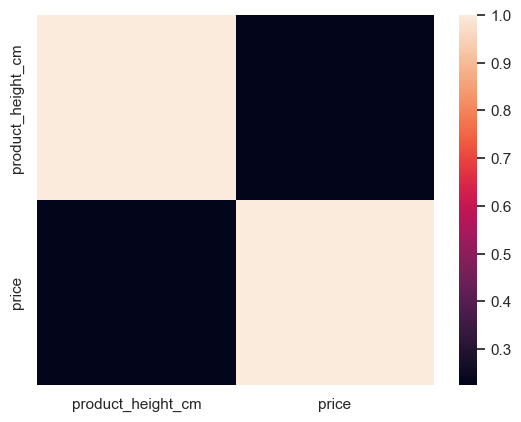

In [417]:
sas.heatmap(olist[['product_height_cm','price']].corr())

<AxesSubplot:>

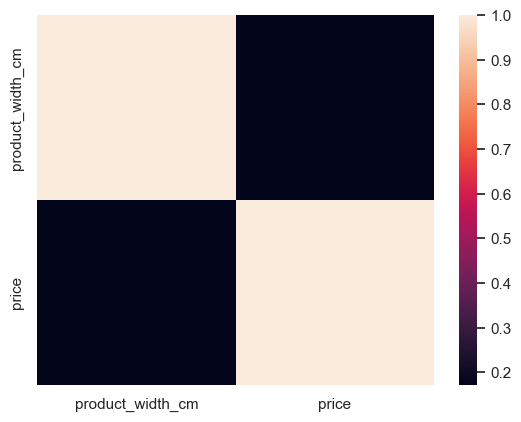

In [418]:
sas.heatmap(olist[['product_width_cm','price']].corr())

<AxesSubplot:>

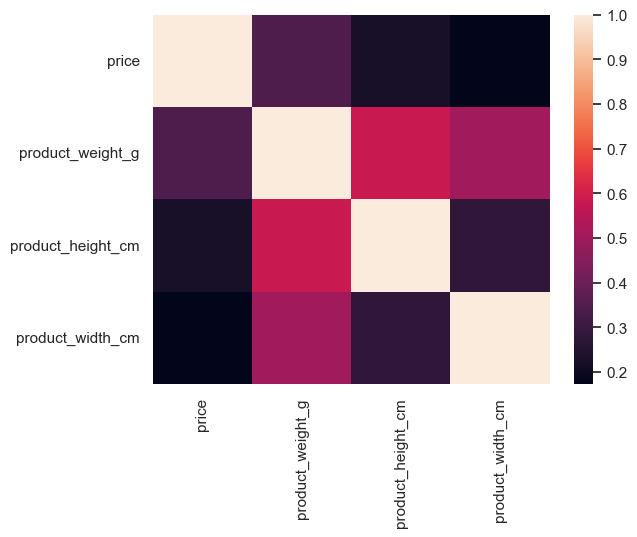

In [423]:
sas.heatmap(olist[['price','product_weight_g','product_height_cm', 'product_width_cm']].corr())

In [ ]:
sas.heatmap(olist[['product_weight_g','price']].corr())

__51-How many seller we have ?__

In [429]:
q_51 = olist.seller_id.nunique()
q_51

3028

__52-Which seller city has the highest and lowest price ?__

In [432]:
q_52 = olist.seller_city.value_counts().head(10)
q_52

sao paulo                28811
ibitinga                  8227
santo andre               3131
curitiba                  3111
sao jose do rio preto     2667
belo horizonte            2584
rio de janeiro            2452
ribeirao preto            2333
maringa                   2279
guarulhos                 2055
Name: seller_city, dtype: Int64

In [431]:
q_52 = olist.seller_city.value_counts().tail(10)
q_52

laguna                     1
carmo da mata              1
campanha                   1
barbacena/ minas gerais    1
vera cruz                  1
uniao da vitoria           1
abadia de goias            1
ipua                       1
dores de campos            1
cascavael                  1
Name: seller_city, dtype: Int64

__53-Is the number of picture affects on take the order without any proplem ?__

In [436]:
olist.groupby('order_status').agg(number_of_photo = ('product_photos_qty','sum')).reset_index()

,order_status,number_of_photo
0,approved,8
1,canceled,1083
2,delivered,249825
3,invoiced,765
4,processing,687
5,shipped,2571
6,unavailable,22
